<a href="https://colab.research.google.com/github/tdm09/assignment01-crisb-7/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importacion de librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# **Conexion a la base de datos**

In [ ]:
url_data = "https://raw.githubusercontent.com/G4LF0/Titanic/main/train.csv"

In [ ]:
df = pd.read_csv(url_data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **Analisis de los datos**

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Cambiando valores**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cambiamos los valores nulos de la columna edad por la media de la edad

In [ ]:
df.fillna({'Age': df.Age.mean()}, inplace=True)

In [ ]:
df.Sex = df.Sex.map({"male":1, "female":0})

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Mapa de calor**

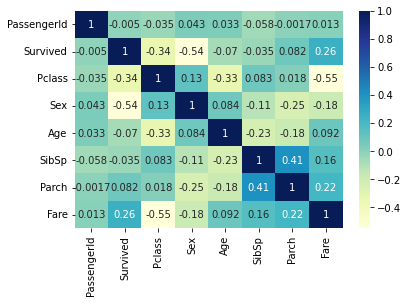

In [ ]:
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

In [ ]:
columns = df.columns
bardata = df.isnull().sum()

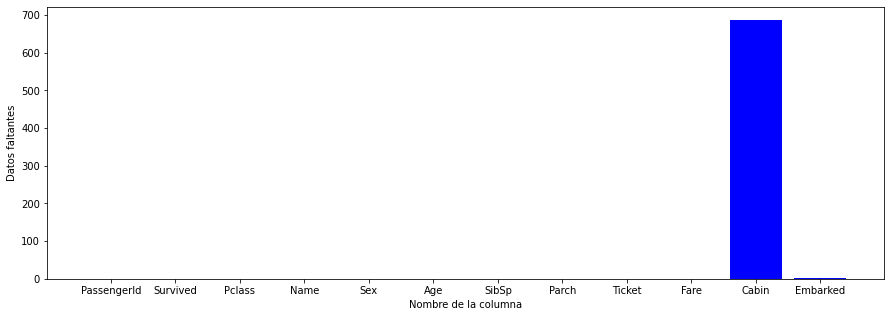

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(columns, bardata, color = "blue")
plt.xlabel('Nombre de la columna')
plt.ylabel('Datos faltantes')
plt.show()

# **Eliminamos columnas con nula relacion**

In [ ]:
df = df.drop(["Cabin", "Embarked", "Ticket", "PassengerId", "Name"], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


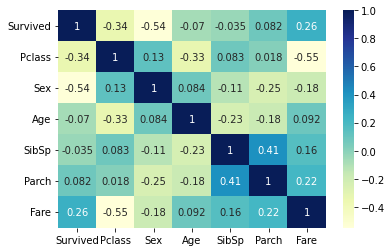

In [ ]:
sn.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

# **Porcentaje de supervivientes por clases**

In [ ]:
CantidadPrimera = df.groupby("Pclass").get_group(1)
CantidadPrimeraVivos = CantidadPrimera.groupby("Survived").get_group(1)
CantidadPrimeraVivos
print(136/216) # Proporcion

0.6296296296296297


In [ ]:
CantidadSegunda = df.groupby("Pclass").get_group(2)
CantidadSegundaVivos = CantidadSegunda.groupby("Survived").get_group(1)
CantidadSegundaVivos
print(87/184)  # Proporcion

0.47282608695652173


In [ ]:
CantidadTercera = df.groupby("Pclass").get_group(3)
CantidadTerceraVivos = CantidadTercera.groupby("Survived").get_group(1)
CantidadTerceraVivos
print(119/491)  # Proporcion

0.24236252545824846
